 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

whale_df = pd.read_csv(r"C:\Users\Common Machine\OneDrive\Desktop\FinTech\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\whale_returns.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns

algo_df = pd.read_csv(r"C:\Users\Common Machine\OneDrive\Desktop\FinTech\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\algo_returns.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices

sp_tsx_df = pd.read_csv(r"C:\Users\Common Machine\OneDrive\Desktop\FinTech\UTOR-VIRT-FIN-PT-11-2022-U-LOLC-main\04-Pandas\Unit 4 Homework\Instructions\Starter_Code\Resources\sp_tsx_history.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types

sp_tsx_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

<ipython-input-10-f2df64fc8b0b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")


In [11]:
# Calculate Daily Returns

daily_returns_sp_tsx = sp_tsx_df.pct_change()
daily_returns_sp_tsx.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls

daily_returns_sp_tsx = daily_returns_sp_tsx.dropna()
daily_returns_sp_tsx.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp_tsx.columns = ['S&P TSX']
daily_returns_sp_tsx.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, daily_returns_sp_tsx], axis = 'columns', join = 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

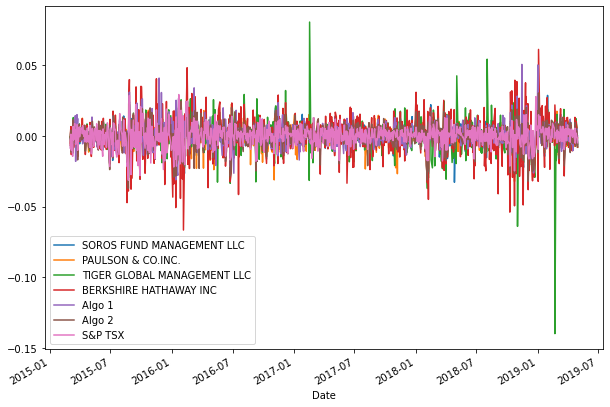

In [15]:
# Plot daily returns of all portfolios

combined_df.plot(figsize = (10,7))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

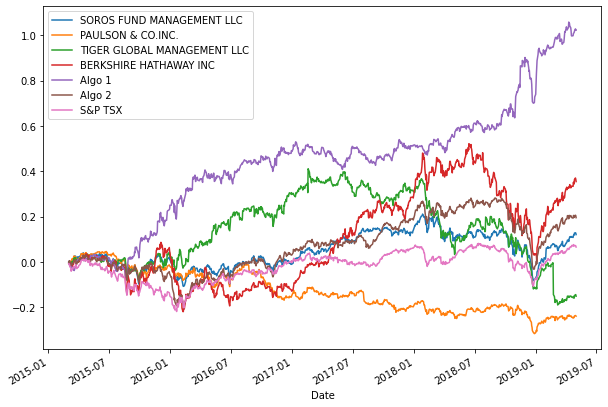

In [16]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns

cumulative_returns.plot(figsize = (10,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

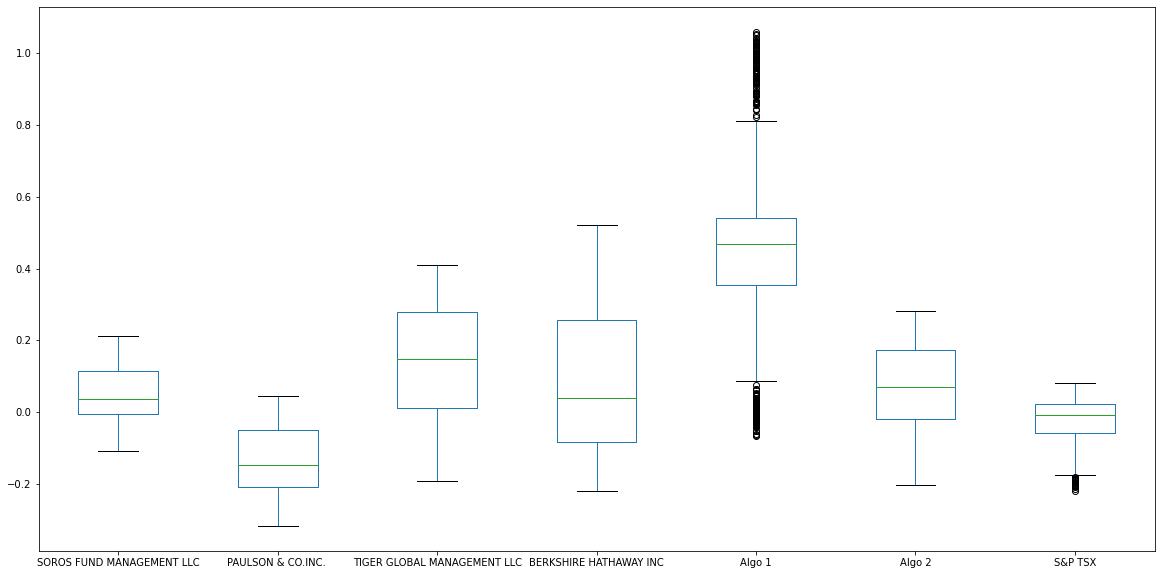

In [17]:
# Box plot to visually show risk

cumulative_returns.plot(kind = 'box', figsize = (20, 10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios

combined_df_std = combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60

sp_tsx_risk = combined_df["S&P TSX"].std()
print(sp_tsx_risk)
# Determine which portfolios are riskier than the S&P TSX 60
combined_df_std > sp_tsx_risk

0.007034167748577725


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

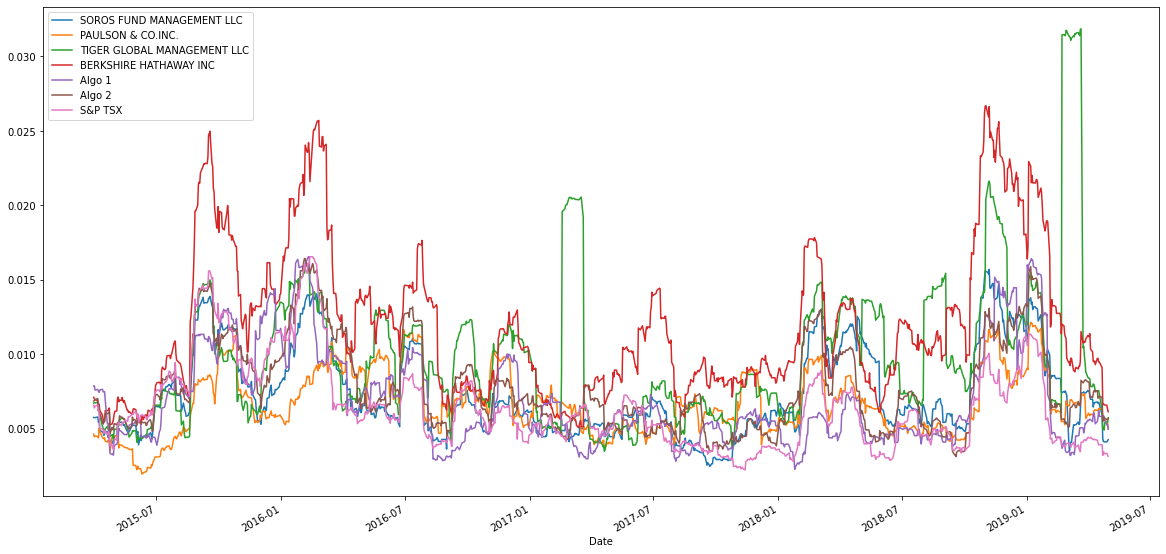

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

roll_combined_df = combined_df.rolling(window = 21).std()

# Plot the rolling standard deviation

roll_combined_df.plot(figsize = (20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

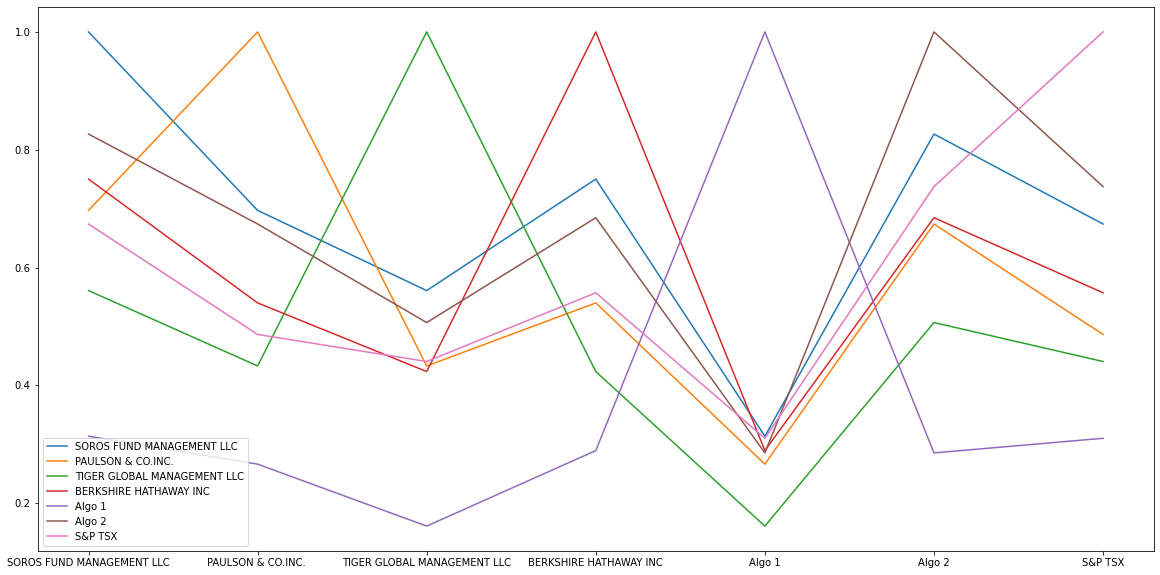

In [22]:
# Calculate the correlation

correlation = combined_df.corr()

# Display de correlation matrix

correlation.plot(figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

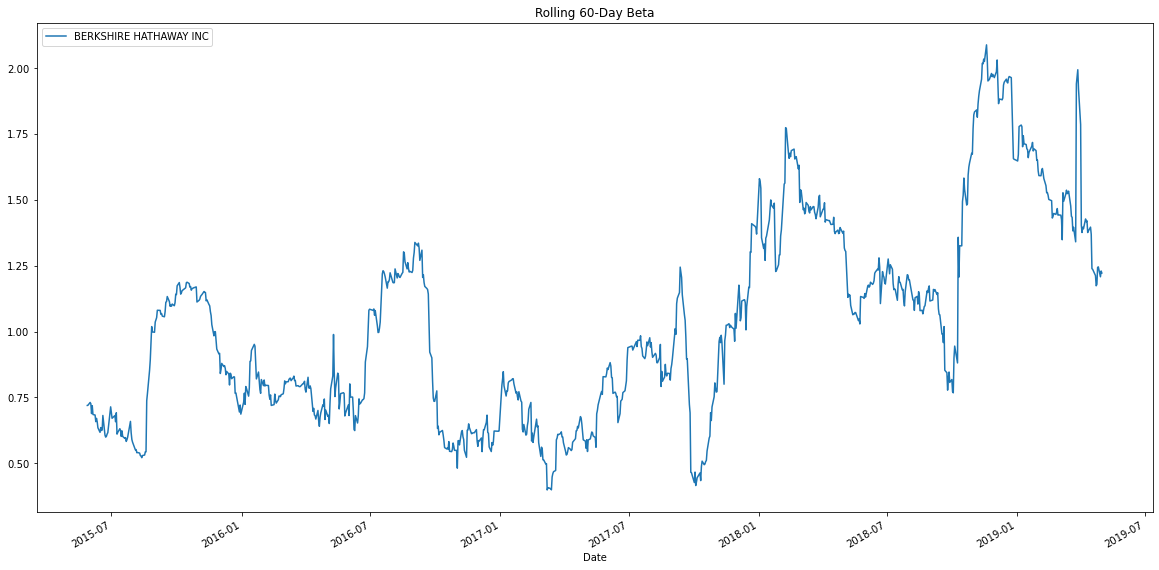

In [23]:
# Calculate covariance of a single portfolio

berk_cov = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P TSX'])

# Calculate variance of S&P TSX

sp_tsx_var = combined_df['S&P TSX'].var()

# Computing beta

berk_beta = berk_cov / sp_tsx_var

# Plot beta trend

roll_berk_cov = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(combined_df['S&P TSX'])

roll_sp_tsx_var = combined_df['S&P TSX'].rolling(window = 60).var()

roll_berk_beta = roll_berk_cov / roll_sp_tsx_var

ax = roll_berk_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta", x = "Date", y = "Beta")

ax.legend(['BERKSHIRE HATHAWAY INC'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

ann_sharpe_ratio = (combined_df.mean() * 252) / annualized_std
ann_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

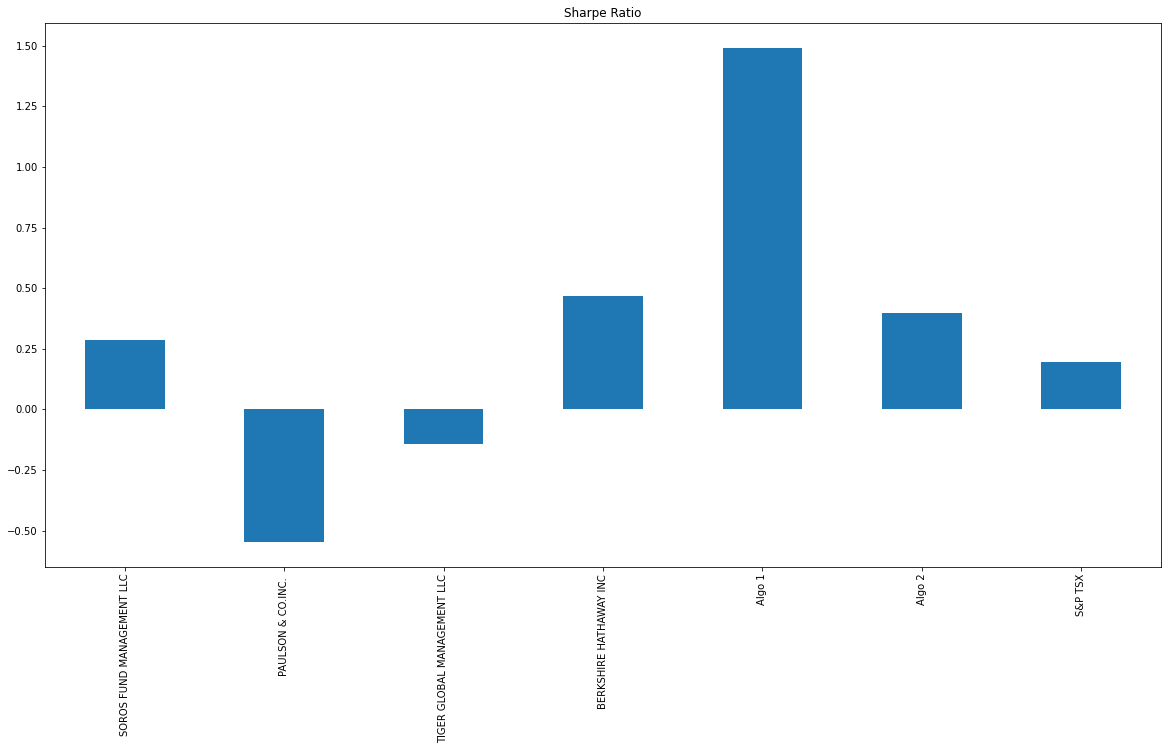

In [26]:
# Visualize the sharpe ratios as a bar plot
ann_sharpe_ratio.plot.bar(figsize = (20,10), title = 'Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock

l_df = pd.read_csv(r"C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 4\Starter_Code\Resources\l_historical.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [28]:
# Reading data from 2nd stock

otex_df = pd.read_csv(r"C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 4\Starter_Code\Resources\otex_historical.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [29]:
# Reading data from 3rd stock

shop_df = pd.read_csv(r"C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 4\Starter_Code\Resources\shop_historical.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [30]:
# Combine all stocks in a single DataFrame
combine1_df = pd.concat([l_df, otex_df, shop_df], axis = 'columns', join = 'inner')
combine1_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [31]:
# Reset Date index


In [32]:
# Reorganize portfolio data by having a column per symbol
combine1_df = combine1_df.drop(columns = ['Symbol'])
combine1_df.columns = ['L', 'OTEX', 'SHOP']
combine1_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [33]:
# Calculate daily returns

daily_returns1 = combine1_df.pct_change()

# Drop NAs

daily_returns1 = daily_returns1.dropna().copy()

# Display sample data

daily_returns1.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_return = daily_returns1.dot(weights)

# Display sample data

portfolio_return.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame

all_returns = pd.concat([daily_returns1, portfolio_return], axis = 'columns', join = 'inner')
all_returns.columns = ['L', 'OTEX', 'SHOP', 'PORT']
all_returns.head()

,L,OTEX,SHOP,PORT
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_returns = all_returns.dropna().copy()
all_returns.head()

,L,OTEX,SHOP,PORT
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565
2018-01-04,0.000174,-0.003715,0.017092,0.004517
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`

annualized_std1 = all_returns.std() * np.sqrt(252)
annualized_std1

L       0.152369
OTEX    0.215132
SHOP    0.488717
PORT    0.216794
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

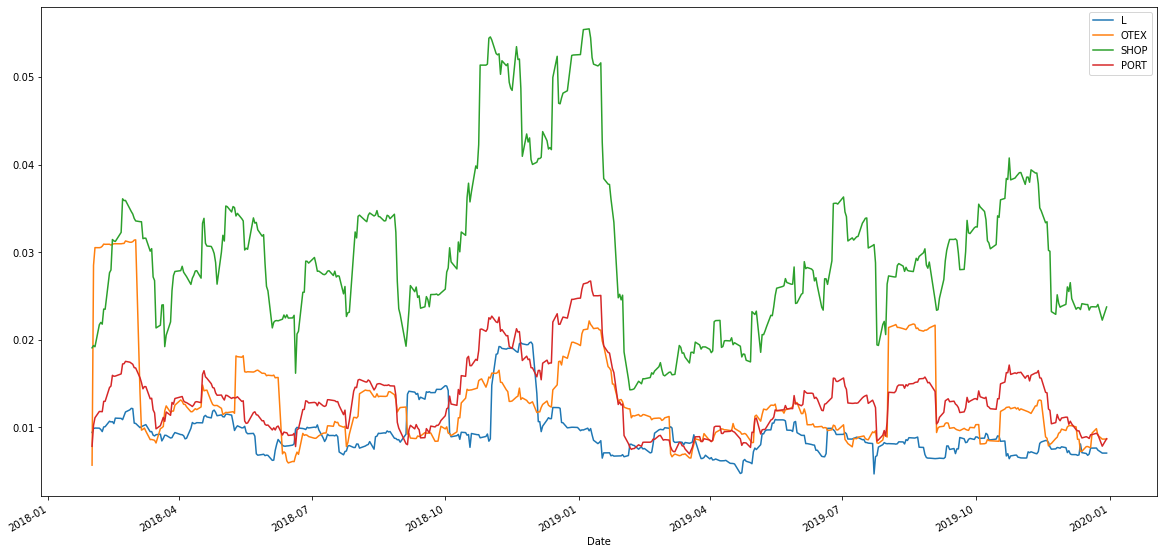

In [49]:
# Calculate rolling standard deviation

roll_all_returns = all_returns.rolling(window = 21).std()

# Plot rolling standard deviation
roll_all_returns.plot(figsize = (20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

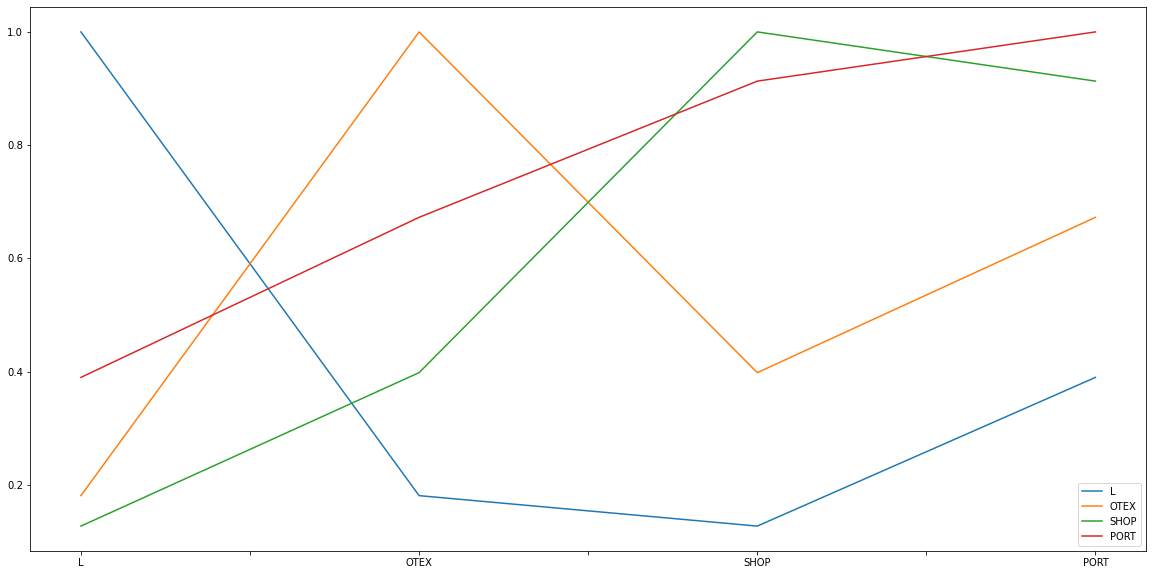

In [50]:
# Calculate and plot the correlation

correlation1 = all_returns.corr()

correlation1.plot(figsize = (20, 10))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

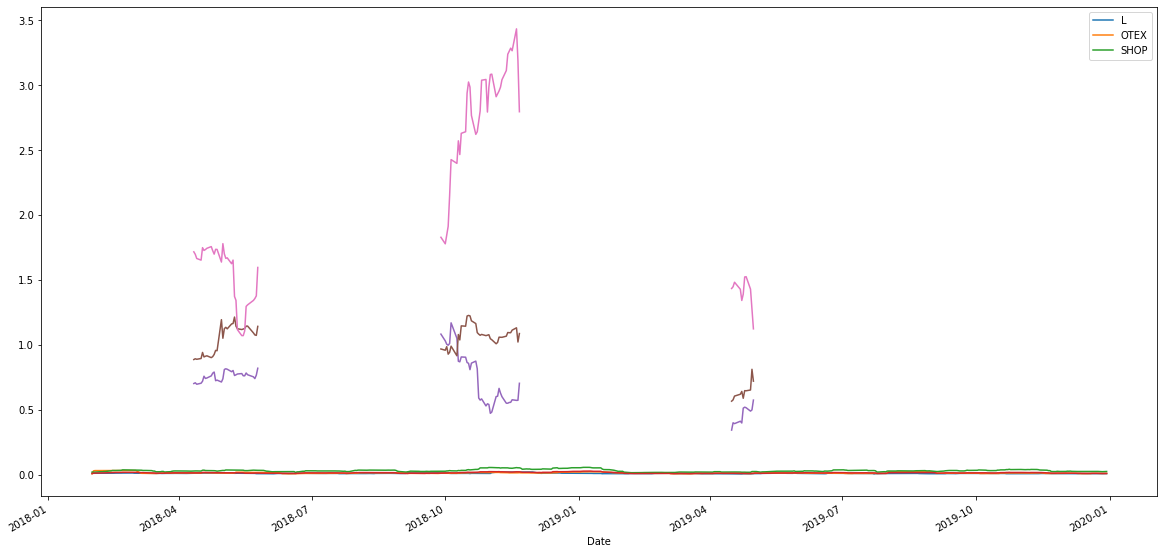

In [60]:
# Calculate and plot Beta
l_cov = all_returns['L'].cov(combined_df['S&P TSX'])
otex_cov = all_returns['OTEX'].cov(combined_df['S&P TSX'])
shop_cov = all_returns['SHOP'].cov(combined_df['S&P TSX'])
# Calculate variance of S&P TSX

sp_tsx1_var = combined_df['S&P TSX'].var()

# Computing beta
l_beta = l_cov / sp_tsx1_var
otex_beta = otex_cov / sp_tsx1_var
shop_beta = shop_cov / sp_tsx1_var
# Plot beta trend
roll_l_cov = all_returns['L'].rolling(window = 60).cov(combined_df['S&P TSX'])
roll_otex_cov = all_returns['OTEX'].rolling(window = 60).cov(combined_df['S&P TSX'])
roll_shop_cov = all_returns['SHOP'].rolling(window = 60).cov(combined_df['S&P TSX'])
roll_sp_tsx1_var = combined_df['S&P TSX'].rolling(window = 60).var()

roll_l_beta = roll_l_cov / roll_sp_tsx1_var
roll_otex_beta = roll_otex_cov / roll_sp_tsx1_var
roll_shop_beta = roll_shop_cov / roll_sp_tsx1_var

ax = roll_all_returns.plot()

#(figsize=(20, 10), title="Rolling 60-Day Beta", x = "Date", y = "Beta")
roll_l_beta.plot(ax=ax, figsize=(20, 10))
roll_otex_beta.plot(ax=ax, figsize=(20, 10))
roll_shop_beta.plot(ax=ax, figsize=(20, 10))

ax.legend(['L', 'OTEX', 'SHOP'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualized Sharpe Ratios

ann_sharpe_ratio1 = (all_returns.mean() * 252) / annualized_std1
ann_sharpe_ratio1

L       0.570084
OTEX    0.743512
SHOP    1.655513
PORT    1.623501
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

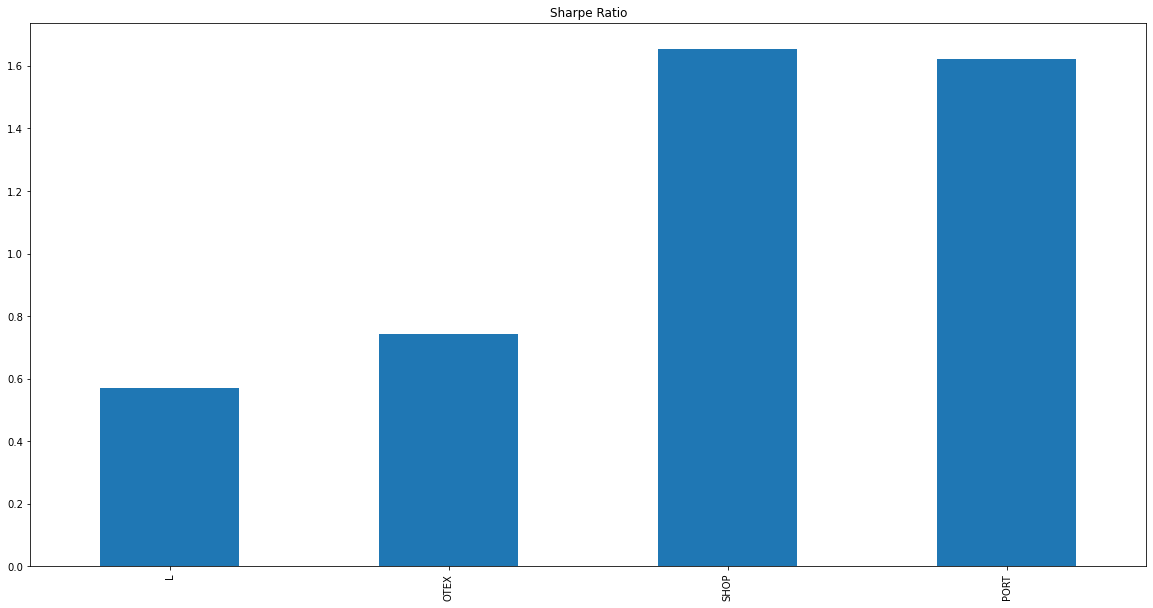

In [58]:
# Visualize the sharpe ratios as a bar plot

ann_sharpe_ratio1.plot.bar(figsize = (20,10), title = 'Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

### My custom portfolio's returns are better than the Whale's portfolio. The collection of stocks give a way better outcome.